# OpenProjection 1.0
<hr>
<br>

## Contents:
1. [Intro](#1-intro): What is OpenProjection?

2. [Context](#2-context): Can be subjective experience be studied quantitatively?

3. [Data](#3-data)
    1. [Load and explore data](#31-load-and-explore-data)
    
    2. [Extract features and targets](#33-extract-features-and-targets)
        1. [Features](#331-features)

        2. [Targets](#322-targets)
            
            1. [Categorical (for classification)](#3221-categorical)

            1. [Continuous (for regression)](#3222-continous)
            
                1. [Unsupervised target selction](#32221-unsupervised-target-selection) 

4. [Pipelines](#4-pipelines)
    1. [Classification](#41-classification)
    
    2. [Regression](#42-regression)

5. [Conclusion](#5-conclusion)

## **1. Intro:**
OpenProjection is a basic open-source machine learning project I designed during my master's. Its main use is as a very beginner-friendly, step-by-step tutorial for machine learning in Python. It covers different types of supervised learning problems, including both regression and classification, as well as an embedded unsupervised learning problem. We'll also practice using an API (remotely accessing some website's functions).

The entire thing can be run from start to finish in Google Colab [here](https://colab.research.google.com/github/shwnmnl/OpenProjection/blob/main/OpenProjection.ipynb), but you'll be able to access it directly in the notebook. The streamlined script is also available if you wanna just jump right in. 
<br>
<br>

## **2. Context:** 
It is said that we do not perceive the world as it is, but as we are. Such poetic truisms capture a key phenomenon that the fields of philosophy, psychology and neurosicence have been grappling with for millenia, centuries and decades, respectively: individuals experience themselves and the world in their own unique and rather impenetrable way. Getting to the core subjective experience holds great promise for many other herculean tasks, such as understanding, preventing and treating the distorsions of subjective experience that lead to mental health diagnoses and ultimately, revealing the nature of consciousness itself. Obviously, we won't be solving the Hard Problem in this notebook, but we will attempt a first pass at quantifying verbal reports of subjective experience and relating them to mental health (broadly construed).

We'll be working with a classic test in psychology, the Thematic Apperception Test (TAT), designed to assess variations in how individuals interpret ambiguous situations. Following from the popular adage at the beginnning of this section, the TAT is founded on the idea that people reveal aspects of themselves when confronted with non-obvious situations. However, the degree to which this is true has never truly been exposed to quantitative statistical verification....until now. 

In simple terms, our goal is to turn TAT verbal reports into numeric variables and determine if they hold any significance/possess any predictive power. So, we'll first need some kind of algorithm that turns words into numbers, and we'll also need some target to predict which would validate whether our algorithm is useful or not. 
<br>

## **3. Data:**
Now we're ready to get our hands dirty, so to speak. Open TAT data has been graciously and freely provided by Middle Tennessee State Univeristy [here](https://jewlscholar.mtsu.edu/items/a54a5d18-3cfa-4700-bbf5-7d68a4375df3). To many, this step is the most crucial since machine learning does not learn out of thin air. The quality of our models depends on the quality of our training data. Or, more bluntly, "gargabe in, garbage out". In this spirit, it is worth mentioning that most projects require at least some data cleaning (if not extensive preprocessing) before jumping into analyses. In our case, the model we'll be using to extract quantitative variables from subjective reports was trained on raw text and thus performs better with minimal preprocessing under most circumstances. 
<br>
<br>

### **3.1. Load and explore data**
When taking a first look at fresh data, you'll want to know a couple of important things:
* How many rows (observations) 
* How many columns (variables), and what kind of data they contain
* If there are any missing values, as well as **how many** and **in which columns** they are if so


In [130]:
import pandas as pd

### Load data into dataframe
df = pd.read_excel('https://jewlscholar.mtsu.edu/bitstreams/7a60d5db-47ed-430c-809b-3c0cefeaa9d7/download')

In [131]:
### Show first five entries
df.head()

,Subject ID #,Source/ Permission Statement,Age,Sex,Race,Date of Admin,Card #,Psychiatric Diagnosis (If Any),"Circumstances surrounding Test (clinical, timed, not timed, experiental)",Other,Narrative
0,1,Used with permission of the Magda Arnold estat...,15,male,unknown,Prior to 1962,1,NaN,NaN,"""inverterate truant""","Well, this boy is looking at his violin and tr..."
1,1,Used with permission of the Magda Arnold estat...,15,male,unknown,Prior to 1962,2,NaN,NaN,"""inverterate truant""",This girl is going to school because her mothe...
2,1,Used with permission of the Magda Arnold estat...,15,male,unknown,Prior to 1962,3BM,NaN,NaN,"""inverterate truant""",This boy is crying ‘cause his mother made him ...
3,1,Used with permission of the Magda Arnold estat...,15,male,unknown,Prior to 1962,4,NaN,NaN,"""inverterate truant""","Oh, that looks like this guy is pretty angry. ..."
4,1,Used with permission of the Magda Arnold estat...,15,male,unknown,Prior to 1962,5,NaN,NaN,"""inverterate truant""","Oh, that seems like this woman is watching to ..."


In [132]:
### How many observations
len(df)

664

In [133]:
### How many columns
len(df.columns)

### Here, df.columns is a list of column names, try it out:
# df.columns

11

In [134]:
### Numbers of rows and columns, respectively
df.shape

(664, 11)

In [135]:
### Get datatypes for each column, this will also show us the column names
df.dtypes

Subject ID #                                                                object
Source/ Permission Statement                                                object
Age                                                                         object
Sex                                                                         object
Race                                                                        object
Date of Admin                                                               object
Card #                                                                      object
Psychiatric Diagnosis (If Any)                                              object
Circumstances surrounding Test (clinical, timed, not timed, experiental)    object
Other                                                                       object
Narrative                                                                   object
dtype: object

In [136]:
### Check if there are NaN or null values in the dataframe
df.isnull().values.any()

True

In [137]:
### Since there are NaNs, let's see how many per column
df.isnull().sum()

Subject ID #                                                                  0
Source/ Permission Statement                                                  0
Age                                                                           0
Sex                                                                           0
Race                                                                          0
Date of Admin                                                                 0
Card #                                                                        0
Psychiatric Diagnosis (If Any)                                              483
Circumstances surrounding Test (clinical, timed, not timed, experiental)    418
Other                                                                       548
Narrative                                                                     0
dtype: int64

In [138]:
### The 'Psychiatric Diagnosis' column caught my attention, let's see what's in there
### This is *foreshadowing* for the classification problem later on

df['Psychiatric Diagnosis (If Any)'].value_counts()

schizophrenia                                                        40
psychoneurosis                                                       28
personality disorder                                                 20
Psychoneurosis: Somatization                                         20
schizophrenia, paranoid type, in remission                           20
deteriorated organic from syphilis of the central nervious system    20
"Severe problems in the sexual area"                                 20
behavior disorder                                                    11
accute symptoms; inability to stay awake                              1
?                                                                     1
Name: Psychiatric Diagnosis (If Any), dtype: int64

In [139]:
### The contents of the 'other' column are also intriguing, let's see how many unique values
df['Other'].value_counts()

Subject described as a scholastic in a teaching order                                                                       20
Wants to break free of relationships and become independent                                                                 20
 "quite delusional and incoherent, but cooperative during the examination and in the ward"                                  20
"Problems so intense that they threaten his capacity to control his drives, allay his anxiety, and alleviate his guilt."    20
Executive Development Program participant                                                                                   10
"inverterate truant"                                                                                                         5
Young woman whose mother divorced and remarried                                                                              4
"Poor teacher"                                                                                                 

In [140]:
### For fun, let's create a slider to scroll through verbal reports
### This is a good way to get a sense of the data
import ipywidgets as widgets
from IPython.display import display, Markdown

### Create a slider
slider = widgets.IntSlider(min=0, 
                           max=len(df)-1, 
                           step=1)
manual_input = widgets.IntText(description = 'Report #', 
                               min = 0, 
                               max=len(df)-1)

### Link slider to dataframe
def view(report):
    """
    Displays narratives in Markdown format.
    
    Args:
        report (str): Slider controlling the narrative to display by index.
    """
    narrative = df['Narrative'][report]
    display(Markdown(narrative))

### Let's get a little wild and add a text box to manually input a report number
def update_slider(change):
    """
    Updates the slider value when manual input changes
    """
    slider.value = change['new']

### Link manual input to the slider
manual_input.observe(update_slider, names='value')   

widgets.interact(view, report=slider)

interactive(children=(IntSlider(value=0, description='report', max=663), Output()), _dom_classes=('widget-inte…

<function __main__.view(report)>

In [141]:
### Okay, now we're interested in getting some statistics on the narratives
### Let's start with the number of words in a narrative

# Comma-separate elements in the first narrative
len(df['Narrative'][0].split())

51

In [142]:
### Since we'll need to do this for each narrative, let's create a function.
### This will also make calculating statistics easier later on.

### Create a function to count words in each narrative
def count_words(narrative):
    """
    Counts the number of words in a narrative.
    
    Args:
        narrative (str): A narrative from the dataframe.
        
    Returns:
        int: Number of words in the narrative.
    """
    return len(narrative.split())

### Apply the function to the dataframe
df['Word Count'] = df['Narrative'].apply(count_words)
df.head()

,Subject ID #,Source/ Permission Statement,Age,Sex,Race,Date of Admin,Card #,Psychiatric Diagnosis (If Any),"Circumstances surrounding Test (clinical, timed, not timed, experiental)",Other,Narrative,Word Count
0,1,Used with permission of the Magda Arnold estat...,15,male,unknown,Prior to 1962,1,NaN,NaN,"""inverterate truant""","Well, this boy is looking at his violin and tr...",51
1,1,Used with permission of the Magda Arnold estat...,15,male,unknown,Prior to 1962,2,NaN,NaN,"""inverterate truant""",This girl is going to school because her mothe...,55
2,1,Used with permission of the Magda Arnold estat...,15,male,unknown,Prior to 1962,3BM,NaN,NaN,"""inverterate truant""",This boy is crying ‘cause his mother made him ...,41
3,1,Used with permission of the Magda Arnold estat...,15,male,unknown,Prior to 1962,4,NaN,NaN,"""inverterate truant""","Oh, that looks like this guy is pretty angry. ...",60
4,1,Used with permission of the Magda Arnold estat...,15,male,unknown,Prior to 1962,5,NaN,NaN,"""inverterate truant""","Oh, that seems like this woman is watching to ...",74


In [143]:
### We'll use the describe() method to get some basic statistics
df['Word Count'].describe()

count    664.000000
mean      99.600904
std       69.471363
min        7.000000
25%       55.000000
50%       82.000000
75%      126.250000
max      741.000000
Name: Word Count, dtype: float64

<AxesSubplot:>

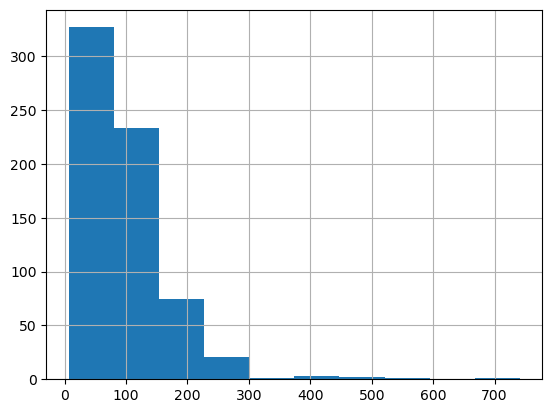

In [144]:
### Let's vuizualize the distribution of word counts
df['Word Count'].hist()

In [145]:
### As you can see, we have quite the spread. 
### I am curious what the shortest narrative contains, as its length is 7

df[df['Word Count']==7.00].Narrative

62    I don’t see anything in this one.
Name: Narrative, dtype: object

In [146]:
### For symmetry's sake, let's see the longest
df[df['Word Count']==741.00].Narrative

653    Hm, we got a, here we have a bunch of cowboys ...
Name: Narrative, dtype: object

In [147]:
### Since we can't see the whole thing, let's print it out
def split_string_into_lines(cell, words_per_line=10):
    """
    Split a long string within a Pandas Series cell into lines with a specified number of words per line.

    Args:
        cell (pd.Series): The input cell containing the long string.
        words_per_line (int): The number of words per line.

    Returns:
        str: The formatted string with line breaks.
    """
    text = cell.iloc[0]  # Get the string value from the cell
    words = text.split()  # Split the input text into words
    lines = []

    for i in range(0, len(words), words_per_line):
        line = " ".join(words[i:i+words_per_line])  # Join words for the current line
        lines.append(line)

    return "\n".join(lines)  # Join lines with line breaks

# Apply the function to the cell in the DataFrame
formatted_text = split_string_into_lines(df[df['Word Count']==741.00].Narrative, words_per_line=10)
print(formatted_text)


Hm, we got a, here we have a bunch of
cowboys out on the ranch. They, they are also horse
thieves and at the present time they have just had
a heavy day drawing up, they have left the farm
and they have come out to the, to ah, oh,
a little ah, just kind of hole in the ground
where they draw up their plans for a big raid
on a ranch tonight where they expect to get a
lot of horses, men with which to start a ranch
of their own. I think there are, oh, there must
be six or seven of them lying around. We only
have four in this picture, and, ah, anyway ah, they
have just made up the plans and now they just
kind of, they think life is so easy and they
have lain down to rest up for the night and,
ah, there happens to be one double-crosser here. It's the
guy that's looking directly at us in the picture, and
he is making plans, they have drawn up all the
plans and he figures well that if, the plans they
have doesn't take seven men to do it so ah,
ah, he decides that he will do it all by
himself. 

### **3.2. Extract features and targets**
#### **3.2.1 Features**
Now we'll use the OpenAI API to extract numerical representations of the narratives.

This requires an OpenAI account (and a credit card) to genereate an API key. 
Embeddings are ridiculously cheap, costing a fraction of a fraction of a penny for many thousands of tokens.
If you choose to do so, you'll simply need to replace "your-api-key-here" with...you guessed it, your own API key.

However, if you can't or don't want to create an account, embeddings are free to share and 
can be downloaded from the [repo](https://github.com/shwnmnl/OpenProjection) or accessed directly from this notebook.
If you choose to do so, you can skip to the next cell and load the embeddings directly.

In [148]:
### Function to get embeddings, do not run this neeedlessly as it will end up costing you money. 
### Ideally, its "one and done", so always test on a small sample before running on the full dataset.

# import openai
# openai.api_key = "your-api-key-here"

# def get_embedding(text: str, model="text-embedding-ada-002") -> list[float]:
#    return openai.Embedding.create(input=[text], model=model)["data"][0]["embedding"]

### Create embeddings for each narrative
# embeddings = [get_embedding(i) for i in df.Narrative]

### Load embeddgins to dataframe with customized column names
# embeddings_df = pd.DataFrame(embeddings, columns=["Col" + str(i) for i in range(1536)])
# embeddings_df

### Save dataframe to csv. Remember, we don't want to do this again. 
# embeddings_df.to_csv("embeddings.csv")

In [149]:
### Load dataframe from csv
embeddings_df = pd.read_csv('https://raw.githubusercontent.com/shwnmnl/OpenProjection/main/embeddings.csv', index_col=0)
embeddings_df

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col1526,Col1527,Col1528,Col1529,Col1530,Col1531,Col1532,Col1533,Col1534,Col1535
0,-0.019910,0.008840,0.024189,0.001328,-0.011896,0.027443,-0.030390,-0.021037,-0.015772,-0.008776,...,0.042741,-0.007719,0.008200,-0.021780,-0.015451,0.004423,0.025509,0.004760,-0.001108,-0.021857
1,-0.014203,-0.007560,-0.002804,-0.019696,-0.019193,0.000404,-0.025163,-0.020274,-0.013449,-0.017559,...,0.037933,0.023567,0.001687,-0.025703,-0.025213,-0.013034,-0.000210,-0.007849,0.013047,0.000271
2,-0.003829,-0.009392,-0.001598,-0.028111,-0.016693,0.007862,-0.012998,0.006184,-0.017114,-0.033081,...,0.029844,0.002286,0.010736,-0.024186,-0.019229,-0.011775,0.009742,-0.004049,0.002690,0.001598
3,-0.026166,-0.009535,0.012973,-0.009257,-0.022244,0.011477,0.014657,-0.015044,-0.003156,-0.009580,...,0.009748,-0.000231,0.016812,-0.029701,-0.019186,0.017986,0.028489,-0.012586,-0.009967,-0.028076
4,-0.016950,-0.000533,-0.000565,-0.023158,-0.008162,0.022596,-0.019403,-0.008015,-0.022673,-0.009753,...,0.031883,0.012569,0.003265,-0.018062,-0.020323,-0.002280,0.019773,-0.005863,0.019876,-0.008328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,-0.010559,-0.011215,0.005124,-0.012698,-0.006905,0.025382,-0.009182,-0.000587,-0.021384,-0.029500,...,0.008077,-0.008911,-0.002458,-0.007335,-0.008342,-0.000311,0.001971,0.009719,-0.004002,-0.006322
660,-0.012830,-0.004969,0.015638,-0.001300,-0.014431,0.030750,-0.003995,-0.032220,-0.000006,-0.024585,...,-0.000699,-0.003219,-0.000495,-0.012450,-0.010233,0.002537,0.010351,-0.019390,0.006346,-0.013283
661,-0.030020,-0.008265,0.001770,-0.017357,-0.016308,0.010697,-0.004939,-0.010022,-0.004408,-0.018419,...,0.015364,0.010750,0.011189,-0.026061,-0.016347,0.005381,0.013699,0.003664,-0.009583,-0.019848
662,-0.022579,-0.014317,0.024106,-0.027486,-0.012679,0.033255,0.003225,-0.011570,-0.009156,-0.024197,...,0.002837,-0.004444,0.008007,-0.036152,-0.018677,0.001785,0.019460,-0.024106,0.000154,-0.013926


#### **3.2.2. Targets**
##### **3.2.2.1. Categorical**
We now have half of the data we need to train a model: the embeddings, or features (X).
The other half will be the target we're either trying to predict or classify (y).
The distinction here is whether the target is a continuous variable (fit for prediction) or a categorical one (fit for classification).

Since we'll demonstrate both, we'll create two targets: 
1. Psychiatric Diagnosis (Classifcation)

2. Psycholinguistic dimension scores (Prediction)

First, we'll create the classification target.
We'll use the 'Psychiatric Diagnosis' column, but we'll need to convert it to a numerical format.
For the sake of simplicity, we'll consider only two classes:
schizophrenia and psychoneurosis (combined from two classes)

In [150]:
# Create df whith only the rows that contain 'schizophrenia' as a diagnosis
schiz = df[df['Psychiatric Diagnosis (If Any)'] == 'schizophrenia']

# Create df whith only the rows that contain 'psychoneurosis' as a diagnosis, including those with 'Psychoneurosis : Somatization'
psychoneuro = df[(df['Psychiatric Diagnosis (If Any)'] == 'Psychoneurosis: Somatization') | (df['Psychiatric Diagnosis (If Any)'] == 'psychoneurosis')]

In [151]:
### Now we have two roughly equivalent categiries to predict
print(schiz.shape)
print(psychoneuro.shape)

(40, 12)
(48, 12)


In [152]:
### Create a dataframe that takes rows from embeddings dataframe that match the index of the schiz dataframe
schiz_embeddings = embeddings_df.loc[schiz.index]

### Add a column with 0 to indicate schizophrenia
schiz_embeddings['diagnosis'] = 0

### Create a dataframe that takes rows from embeddings dataframe that match the index of the psychoneuro dataframe
psychoneuro_embeddings = embeddings_df.loc[psychoneuro.index]

### Add a column with 1 to indicate psychoneurosis
psychoneuro_embeddings['diagnosis'] = 1

### Combine into a single dataframe
combined_embeddings = pd.concat([schiz_embeddings, psychoneuro_embeddings])

### Shuffle data for good measure while keeping indexes and we're good to go!
combined_embeddings = combined_embeddings.sample(frac=1, random_state=42)
combined_embeddings

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col1527,Col1528,Col1529,Col1530,Col1531,Col1532,Col1533,Col1534,Col1535,diagnosis
423,-0.000503,-0.007471,0.043933,-0.020680,-0.027705,0.029832,0.005131,0.002485,0.005590,-0.016846,...,-0.023726,0.009375,-0.033744,-0.015717,-0.000226,0.014981,-0.012375,0.002078,-0.018001,1
232,-0.020636,-0.003380,0.042379,-0.005340,-0.034288,0.024155,-0.013692,-0.028833,-0.010417,-0.008658,...,-0.012315,-0.004059,-0.020030,-0.027304,0.007281,0.021730,-0.011662,0.013613,-0.035158,0
258,0.022897,-0.020754,0.006540,-0.022227,-0.004866,0.027093,0.001759,-0.004317,-0.029381,-0.020714,...,-0.004643,0.019360,-0.016650,-0.017124,0.008299,0.019070,-0.007970,0.006227,-0.026817,0
254,0.001268,0.003974,-0.004622,-0.006718,-0.028090,0.032612,-0.013159,-0.009409,-0.018766,-0.001823,...,-0.006394,0.008490,-0.027428,0.010130,-0.022813,-0.002931,0.014561,0.001494,-0.029121,0
244,-0.007054,-0.006816,0.023267,-0.003821,-0.002486,0.022799,0.006462,-0.013024,-0.007702,-0.018507,...,-0.003129,0.020646,-0.027787,-0.018333,0.008418,0.017089,-0.016768,-0.024564,-0.022772,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,-0.019450,0.000388,0.033695,-0.003796,-0.023195,0.023005,-0.012404,-0.024021,-0.002573,-0.017749,...,-0.007808,0.006976,-0.011718,-0.006583,-0.006050,0.030597,0.003336,-0.005478,-0.013978,0
398,0.002000,-0.005972,0.027792,-0.041515,-0.008913,0.010246,-0.003291,-0.010179,-0.023009,-0.014935,...,0.000359,0.027392,-0.020451,-0.013030,0.020584,0.006538,0.004780,-0.005716,-0.028858,1
418,0.003337,0.003842,-0.026016,-0.019600,0.000369,0.038549,-0.002613,0.001870,-0.037355,-0.005114,...,0.000821,0.011855,-0.010085,-0.024564,0.013890,0.018420,-0.013591,0.006748,-0.009508,1
246,-0.022995,-0.010817,-0.000676,-0.015805,-0.000305,0.014173,0.001317,-0.003326,-0.018953,-0.000703,...,-0.021298,0.038061,-0.022218,0.002936,0.026039,-0.007242,-0.006840,0.015779,-0.013836,0


##### **3.2.2.2 Continous**
To create our regression targets, I simulated psycholinguistic dimensions akin to those produced by Linguistic Inquiry and Word Count (LIWC-22) software. For legal and licensing reasons, these dimensions are fictitious. Download them from the [repo]('https://github.com/shwnmnl/OpenProjection') or access them directly in the notebook.

In [153]:
targets = pd.read_csv('https://raw.githubusercontent.com/shwnmnl/OpenProjection/main/targets.csv', index_col=0)
targets

,Cognition,Affect,Social,Perception,overgeneralization,insightfulness,causality,conditional,safety,assurance,...,attention,movement,spatial,vision,auditory,interoception,time,nostalgic,contemporary,prospective
0,9.80,11.76,15.69,7.84,0.00,1.96,0.00,5.88,0.00,0.00,...,0.00,0.00,5.88,1.96,0.00,0.00,1.96,0.00,5.88,7.84
1,18.18,3.64,18.18,9.09,1.82,0.00,1.82,5.45,1.82,0.00,...,0.00,3.64,9.09,0.00,0.00,0.00,7.27,1.82,7.27,18.18
2,29.27,7.32,36.59,2.44,0.00,0.00,4.88,9.76,4.88,0.00,...,0.00,2.44,2.44,0.00,0.00,0.00,2.44,14.63,4.88,0.00
3,20.00,5.00,26.67,10.00,0.00,5.00,1.67,5.00,8.33,1.67,...,0.00,1.67,1.67,3.33,0.00,3.33,1.67,1.67,15.00,5.00
4,12.16,2.70,24.32,5.41,0.00,2.70,0.00,2.70,4.05,0.00,...,1.35,2.70,1.35,2.70,0.00,0.00,6.76,0.00,12.16,9.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,6.84,8.55,27.35,6.84,4.27,0.00,0.00,0.00,0.85,0.00,...,0.00,1.71,5.98,0.00,0.00,0.00,5.13,5.98,11.11,0.00
660,2.75,7.34,11.01,12.84,0.92,0.92,0.00,0.00,0.92,0.00,...,0.00,3.67,8.26,0.92,0.00,0.00,0.92,1.83,10.09,9.17
661,6.86,5.88,24.51,11.76,1.96,0.98,0.98,0.00,0.98,0.00,...,0.00,3.92,5.88,0.00,1.96,0.00,6.86,1.96,10.78,1.96
662,8.26,5.79,14.05,11.57,0.83,2.48,1.65,0.83,2.48,0.00,...,0.00,1.65,7.44,1.65,0.00,1.65,4.13,4.96,2.48,0.00


In [154]:
### Get targets for combined_embeddings indexes
final_targets = targets.loc[combined_embeddings.index]

##### **3.2.2.2.1 Unsupervised target selection**
In this case, we have our 'first order constructs' (Cognition, Affect, Social and Perception), which for the sake if this project, count as our main target of interest. However, in many real-world situations we may not be so lucky. Instead, we may have a great many variables supposedly associated with our ill-defined target of interest.

Here's where the cross-over between more traditional statistics, as used in psychology and psychometrics, and unsupervised machine learrning begins.
* On one hand, unsupervised learning assumes no ground truth and thus requires no 'y' or target variable. Rather, such techniques attempt to discover patterns in the data itself and reduce the number of input variables to a lower number of variables that contain (roughly) the same meaning. This is often referred to as dimensionality reduction and a common method is Principal Component Anlysis, or PCA. 

* On the other, psychometry often employs what is called Factor Anlysis (FA) to infer from many variables a smaller set of *latent* variables that the former are thought to be associated with. 

There are some important statistical distinctions between PCA and FA which make them not entirely indistinguishable, but the same broadstrokes apply to both: we're trying to crunch our data down to a more manageable size without loosing signal (hopefully).

In [155]:
### Do PCA on targets
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(targets.iloc[:,4:])
principalDf = pd.DataFrame(data = principalComponents
                , columns = ['principal component 1', 'principal component 2'])
principalDf


,principal component 1,principal component 2
0,-3.927312,-0.467156
1,-3.211656,2.448882
2,7.486393,-7.424196
3,-9.788387,-5.336121
4,-7.778708,-3.379663
...,...,...
659,-0.979734,-2.651345
660,-4.914058,1.662119
661,-3.566104,-0.417523
662,3.108410,1.953898


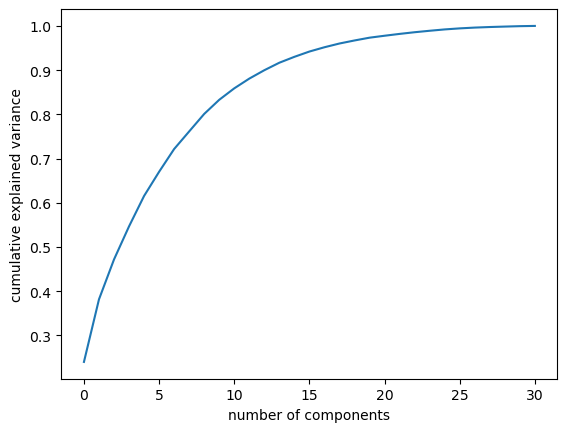

In [156]:
### Scree plot for PCA to see best number of components
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(targets.iloc[:,4:])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


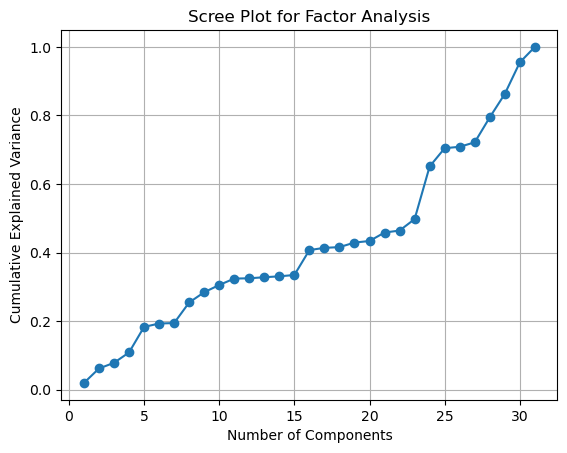

In [157]:
### Import FactorAnalysis
from sklearn.decomposition import FactorAnalysis

### Fit Factor Analysis on your data
fa = FactorAnalysis(n_components=2)
fa.fit(targets.iloc[:, 4:])

### Calculate eigenvalues
eigenvalues = fa.noise_variance_

### Calculate explained variance ratios
explained_variance_ratio = eigenvalues / eigenvalues.sum()

### Create a scree plot
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for Factor Analysis')
plt.grid()
plt.show()


## **4. Pipelines:**
### **4.1. Classification**

In [158]:
### First, we'll split the data into training and testing sets
from sklearn.model_selection import train_test_split

### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_embeddings.iloc[:,:-1], combined_embeddings.iloc[:,-1], test_size=0.2, random_state=42)

### Import the classifier
from sklearn.linear_model import LogisticRegression

### Instantiate the classifier
lr = LogisticRegression(random_state=42)

### Fit the classifier to the training data
lr.fit(X_train, y_train)

### Predict the diagnosis for the test data
y_pred = lr.predict(X_test)

### Import the metrics module
from sklearn import metrics

### Get the accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

### Get the confusion matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

### Get the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
Confusion Matrix:
[[ 3  1]
 [ 2 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.92      0.86      0.89        14

    accuracy                           0.83        18
   macro avg       0.76      0.80      0.78        18
weighted avg       0.85      0.83      0.84        18



In [159]:
### Let's try a different classifier
### Import the classifier   
from sklearn.ensemble import RandomForestClassifier

### Instantiate the classifier
rfc = RandomForestClassifier(random_state=42)

### Fit the classifier to the training data
rfc.fit(X_train, y_train)

### Predict the diagnosis for the test data
y_pred2 = rfc.predict(X_test)

### Get the accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

### Get the confusion matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred2))

### Get the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred2))

Accuracy: 0.8888888888888888
Confusion Matrix:
[[ 3  1]
 [ 1 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.93      0.93      0.93        14

    accuracy                           0.89        18
   macro avg       0.84      0.84      0.84        18
weighted avg       0.89      0.89      0.89        18



In [160]:
### Prettier version of the same thing
class ClassificationPipeline:
    def __init__(self, data, target_column, test_size=0.2, random_state=42):
        self.data = data
        self.target = target_column
        self.test_size = test_size
        self.random_state = random_state
        self.classifier = None

    def split_data(self):
        X = self.data
        y = self.target
        return train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

    def train_classifier(self, model):
        X_train, X_test, y_train, y_test = self.split_data()
        self.classifier = model
        self.classifier.fit(X_train, y_train)

    def evaluate_classifier(self):
        y_pred = self.classifier.predict(X_test)
        
        accuracy = metrics.accuracy_score(y_test, y_pred)
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        classification_report = metrics.classification_report(y_test, y_pred)
        
        return accuracy, confusion_matrix, classification_report

# Create the pipeline
pipeline = ClassificationPipeline(combined_embeddings.iloc[:,:-1], combined_embeddings.iloc[:,-1])

# Train the classifier (e.g., Logistic Regression)
pipeline.train_classifier(LogisticRegression(random_state=42))

# Evaluate the classifier
accuracy, confusion_matrix, classification_report = pipeline.evaluate_classifier()

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix)
print("Classification Report:")
print(classification_report)

Accuracy: 0.8333333333333334
Confusion Matrix:
[[ 3  1]
 [ 2 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.92      0.86      0.89        14

    accuracy                           0.83        18
   macro avg       0.76      0.80      0.78        18
weighted avg       0.85      0.83      0.84        18



### **4.2. Regression**

In [161]:
### Now we'll try a regression problem where we'll use the embeddings to predict Cognition, Affect, Social, and Perception
### First we'll import the model
from sklearn.linear_model import Ridge, Lasso, LinearRegression

### Instantiate the model
lr = Ridge()

### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_embeddings.iloc[:,:-1], final_targets.Cognition, test_size=0.2, random_state=42)

### Fit the model to the training data
lr.fit(X_train, y_train)

### Predict the diagnosis for the test data
y_pred = lr.predict(X_test)

### Evaluate the regression model
from sklearn.metrics import mean_squared_error, r2_score

### The coefficients
print('Coefficients: \n', lr.coef_)
### The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
### The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))



Coefficients: 
 [-0.60206779  0.55829109  0.10139829 ... -0.51101004  0.71653433
 -0.82716687]
Mean squared error: 13.24
Coefficient of determination: 0.19


In [162]:
### Like we did with the classification problem, we'll create a pipeline to make things easier
class RegressionPipeline:
    def __init__(self, data, target_column, test_size=0.2, random_state=42):
        self.data = data
        self.target = target_column
        self.test_size = test_size
        self.random_state = random_state
        self.regressor = None

    def split_data(self):
        X = self.data
        y = self.target
        return train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

    def train_regressor(self, model):
        X_train, X_test, y_train, y_test = self.split_data()
        self.regressor = model
        self.regressor.fit(X_train, y_train)

    def evaluate_regressor(self):
        y_pred = self.regressor.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        return mse, r2
    
# Create the pipeline
pipeline = RegressionPipeline(combined_embeddings.iloc[:,:-1], final_targets.Cognition)

# Train the classifier (e.g., Logistic Regression)
pipeline.train_regressor(Ridge())

# Evaluate the classifier
mse, r2 = pipeline.evaluate_regressor()

# Print results
print("Mean Squared Error:", mse)
print("Coefficient of Determination:", r2)

Mean Squared Error: 13.24284903954267
Coefficient of Determination: 0.18634573094233464


In [163]:
### Let's create a function to run the pipeline for each target and store results in a dataframe
def run_regression_pipeline(data, targets):
    """
    Runs the regression pipeline for each target and stores results in a dataframe.
    
    Args:
        data (pd.DataFrame): The dataframe containing the embeddings.
        targets (pd.DataFrame): The dataframe containing the targets.
        
    Returns:
        pd.DataFrame: The dataframe containing the results.
    """
    results = pd.DataFrame()
    
    for target in targets.columns[:4]:
        pipeline = RegressionPipeline(data, targets[target])
        pipeline.train_regressor(Ridge())
        mse, r2 = pipeline.evaluate_regressor()
        results[target] = [mse, r2]
        
    results.index = ['MSE', 'R2']
    
    return results

### Run the function
results = run_regression_pipeline(combined_embeddings.iloc[:,:-1], final_targets)

### Transpose the dataframe
results = results.T

### Rename columns
results.columns = ['MSE', 'R2']

### Sort by R2
results.sort_values(by='R2', ascending=False)

,MSE,R2
Cognition,13.242849,0.186346
Perception,17.489898,-0.074597
Affect,57.899892,-2.557429
Social,64.837881,-2.983706


## **5. Conclusion**
As you can see, our classifier fared better than our regression model. This may or may not be suprising, since the regression targets were purely fictitious, whereas the classification targets were more strongly grounded, so to say. Naturally, the grand questions we set our sights on at the outset are far from being settled thanks to these modest computational efforts. Whether or not subjective experience can be meaningfully quantified depends partly on what can be gained by the numbers we get some black box to generate. 

Nevertheless, in this notebook, we covered all major data scientific steps required to perform machine learning in the context of psychological data. 

